<a href="https://colab.research.google.com/github/Aadiie/EDA-TXHousing/blob/main/22BDS0424.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# phase 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree, connected_components
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/txhousing.csv"
df = pd.read_csv(url)
df.head()


,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333


In [ ]:
# Dataset dimensions

print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)


Shape of dataset: (8602, 10)

Column names: ['rownames', 'city', 'year', 'month', 'sales', 'volume', 'median', 'listings', 'inventory', 'date']

Data types:
 rownames       int64
city          object
year           int64
month          int64
sales        float64
volume       float64
median       float64
listings     float64
inventory    float64
date         float64
dtype: object


In [ ]:
# Summary Statistics
print("\nSummary statistics:\n", df.describe(include='all'))


Summary statistics:
            rownames     city         year        month        sales  \
count   8602.000000     8602  8602.000000  8602.000000  8034.000000   
unique          NaN       46          NaN          NaN          NaN   
top             NaN  Abilene          NaN          NaN          NaN   
freq            NaN      187          NaN          NaN          NaN   
mean    4301.500000      NaN  2007.299465     6.406417   549.564600   
std     2483.327841      NaN     4.502923     3.441932  1110.737179   
min        1.000000      NaN  2000.000000     1.000000     6.000000   
25%     2151.250000      NaN  2003.000000     3.000000    86.000000   
50%     4301.500000      NaN  2007.000000     6.000000   169.000000   
75%     6451.750000      NaN  2011.000000     9.000000   467.000000   
max     8602.000000      NaN  2015.000000    12.000000  8945.000000   

              volume         median      listings    inventory         date  
count   8.034000e+03    7986.000000   7178.0000

In [ ]:
#  Data Handling
print("\nTop 5 rows:\n", df.head())
print("\nNumber of unique cities:", df['city'].nunique())
print("\nData for Austin:\n", df[df['city'] == 'Austin'].head())

In [ ]:
# Sorting by sales
sorted_df = df.sort_values(by='sales', ascending=False)
print("\nTop sales:\n", sorted_df.head())

In [ ]:
# Data Cleaning
# Missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 rownames        0
city            0
year            0
month           0
sales         568
volume        568
median        616
listings     1424
inventory    1467
date            0
dtype: int64


In [ ]:
# Filling missing values for sales with median
df['sales'] = df['sales'].fillna(df['sales'].median())

In [ ]:
# Drop rows with too many missing values
df.dropna(thresh=len(df.columns)-2, inplace=True)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.show()


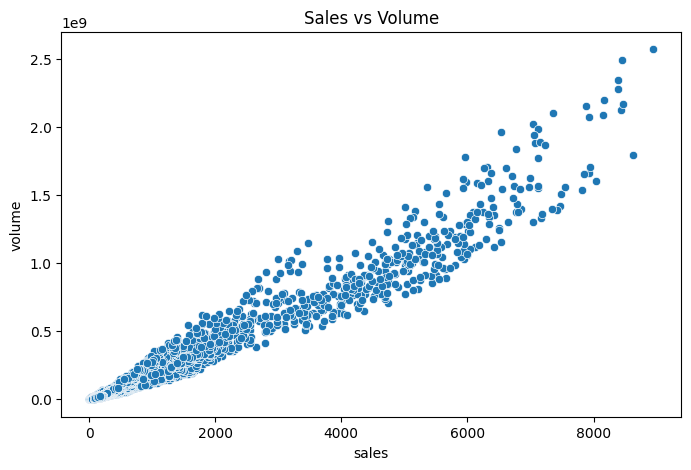

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(8,5))
sns.scatterplot(x='sales', y='volume', data=df)
plt.title('Sales vs Volume')
plt.show()

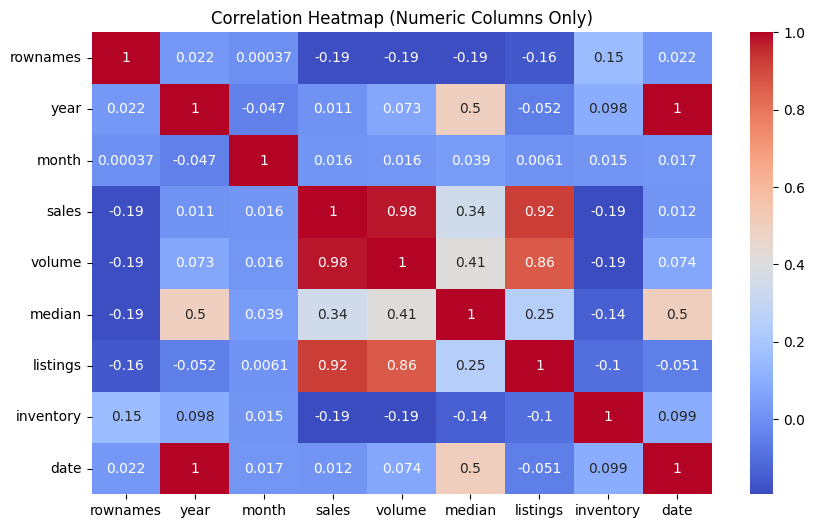

In [ ]:
#  Multivariate Analysis
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])  # keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


In [4]:
# Phase 2
# part 1 - Module 4
# Calculate skewness for key numerical columns
skewness = df[['sales', 'volume', 'median', 'listings', 'inventory']].skew()
print("Skewness of the variables:\n", skewness)

Skewness of the variables:
 sales        3.889920
volume       4.304456
median       0.841040
listings     3.889059
inventory    3.807512
dtype: float64


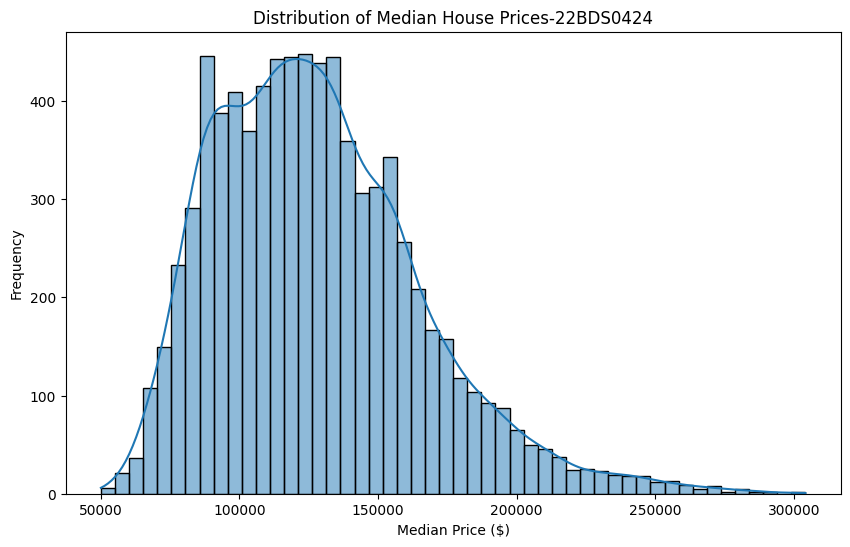

In [7]:
# Plotting the distribution of the median house price
plt.figure(figsize=(10, 6))
sns.histplot(df['median'], bins=50, kde=True)
plt.title('Distribution of Median House Prices-22BDS0424')
plt.xlabel('Median Price ($)')
plt.ylabel('Frequency')
plt.show()

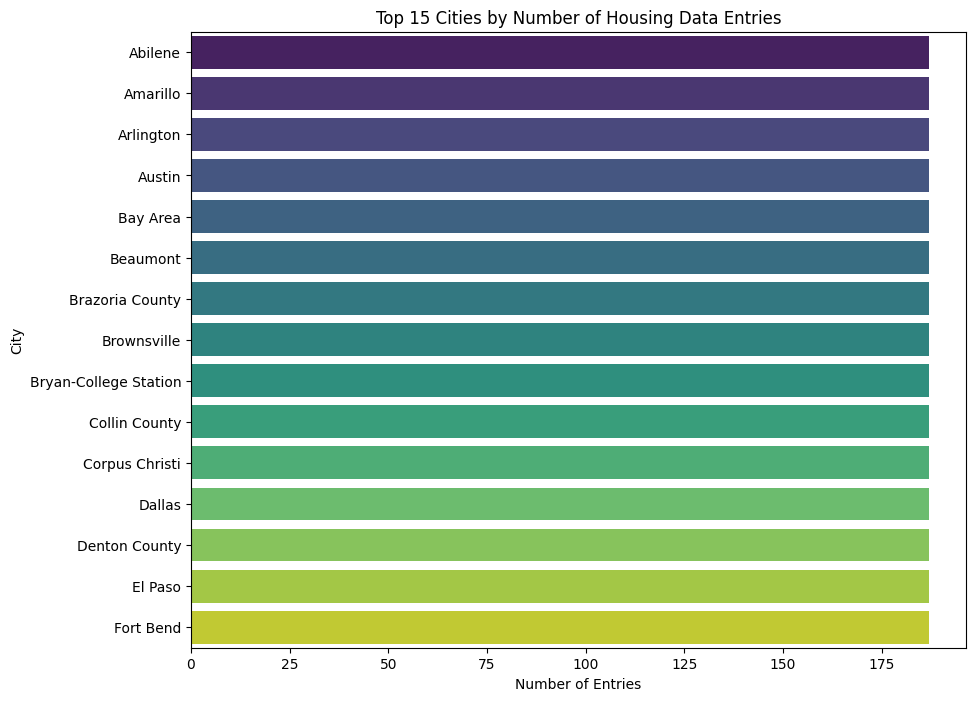

In [20]:
# Plotting the top 15 cities with the most data entries
plt.figure(figsize=(10, 8))
city_counts = df['city'].value_counts().nlargest(15)
sns.barplot(x=city_counts.values, y=city_counts.index, hue=city_counts.index, palette='viridis', legend=False)
plt.title('Top 15 Cities by Number of Housing Data Entries- 22BDS0424')
plt.xlabel('Number of Entries')
plt.ylabel('City')
plt.show()

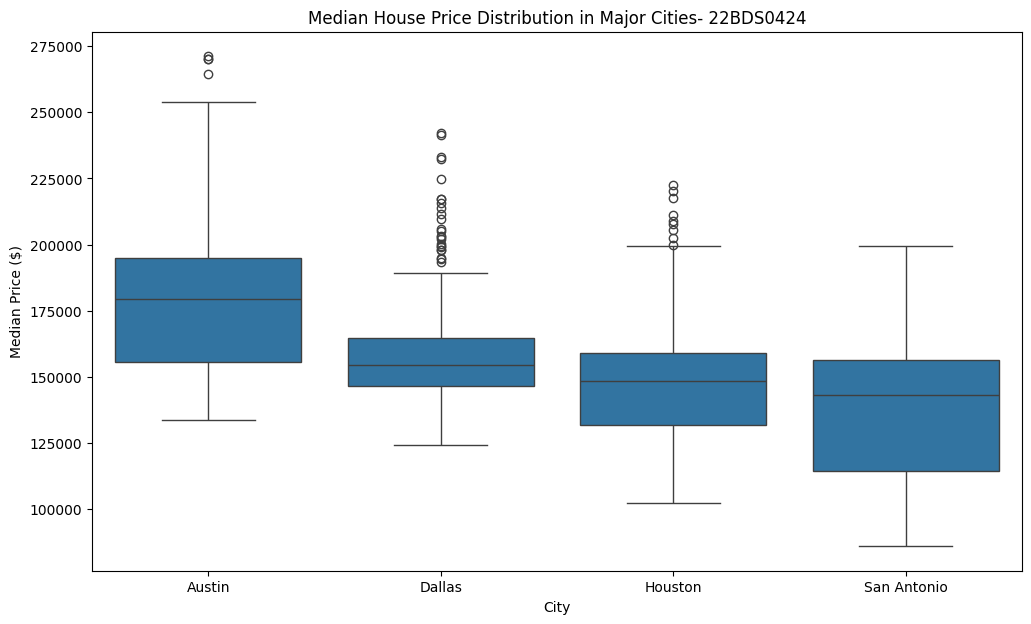

In [10]:
# Comparing median house prices in major Texas cities
major_cities = ['Houston', 'Dallas', 'Austin', 'San Antonio']
df_cities = df[df['city'].isin(major_cities)]

plt.figure(figsize=(12, 7))
sns.boxplot(x='city', y='median', data=df_cities)
plt.title('Median House Price Distribution in Major Cities- 22BDS0424')
plt.xlabel('City')
plt.ylabel('Median Price ($)')
plt.show()

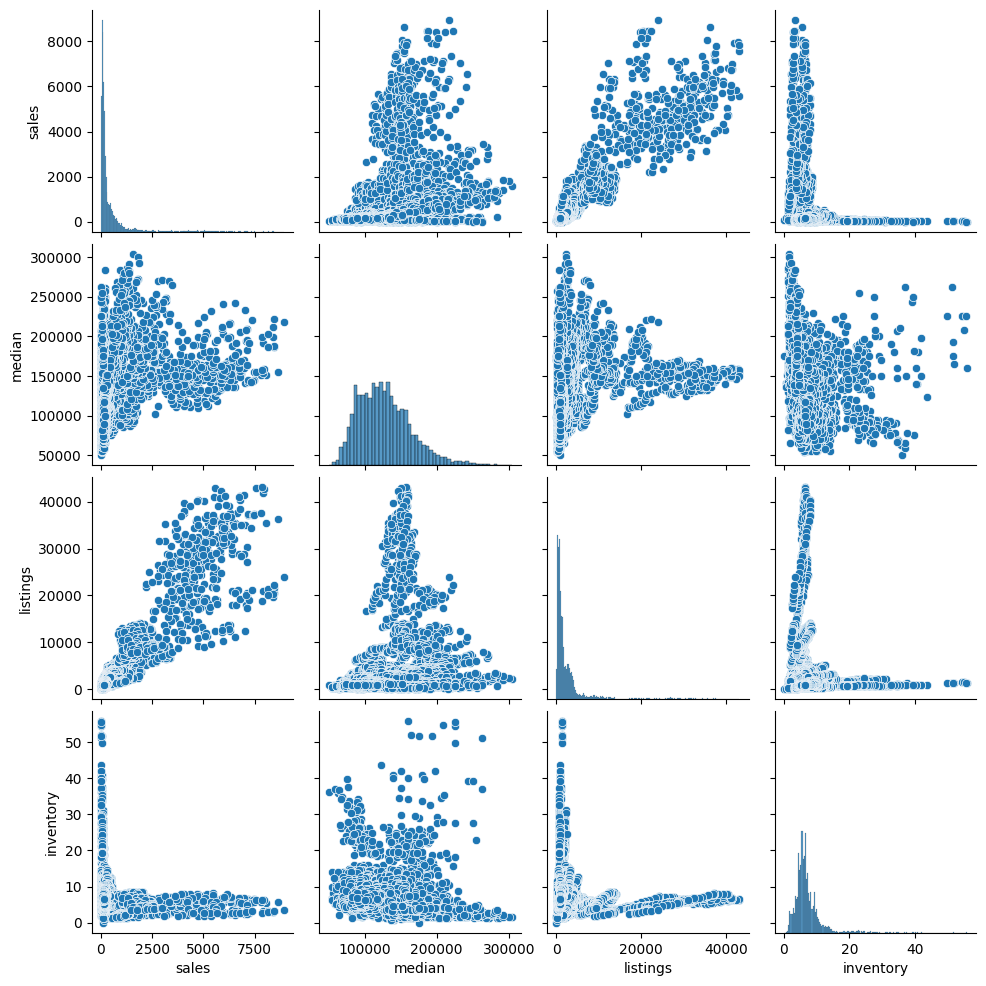

In [11]:
# Pairplot for a subset of key numerical variables
sns.pairplot(df[['sales', 'median', 'listings', 'inventory']])
plt.show()

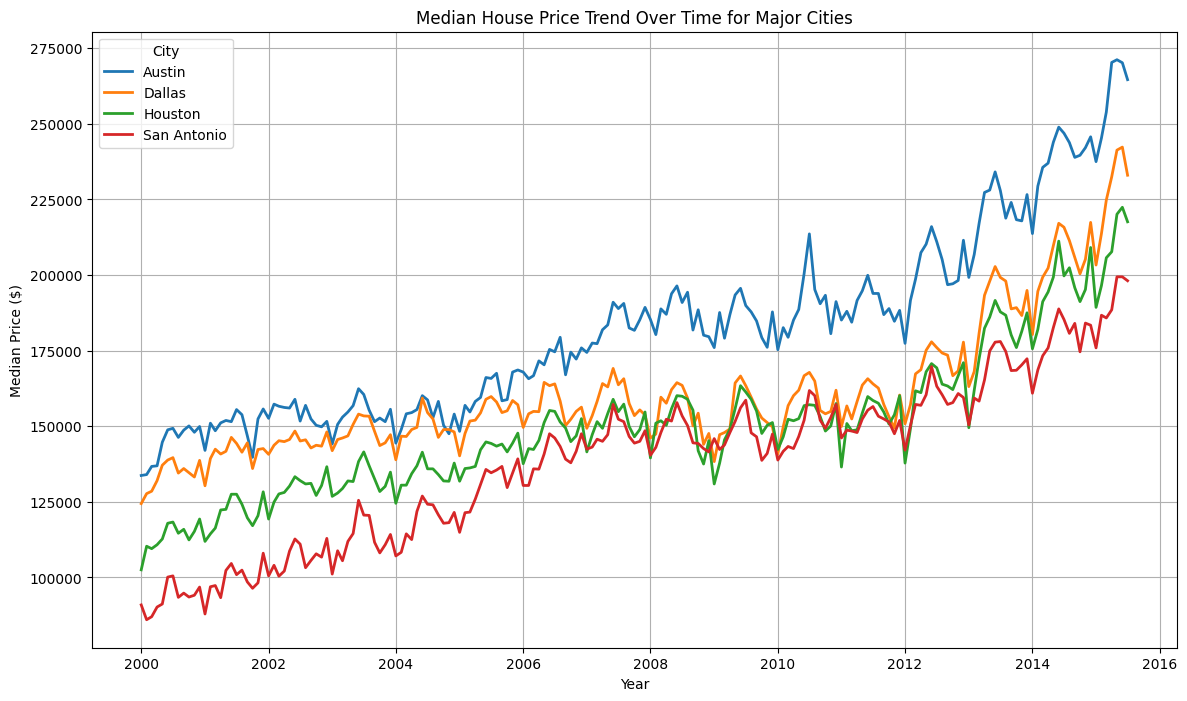

In [14]:
#  plotting the data using the corrected df_cities dataframe
df['date_time'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


major_cities = ['Houston', 'Dallas', 'Austin', 'San Antonio']
df_cities = df[df['city'].isin(major_cities)]


plt.figure(figsize=(14, 8))
sns.lineplot(data=df_cities, x='date_time', y='median', hue='city', lw=2)
plt.title('Median House Price Trend Over Time for Major Cities')
plt.xlabel('Year')
plt.ylabel('Median Price ($)')
plt.legend(title='City')
plt.grid(True)
plt.show()

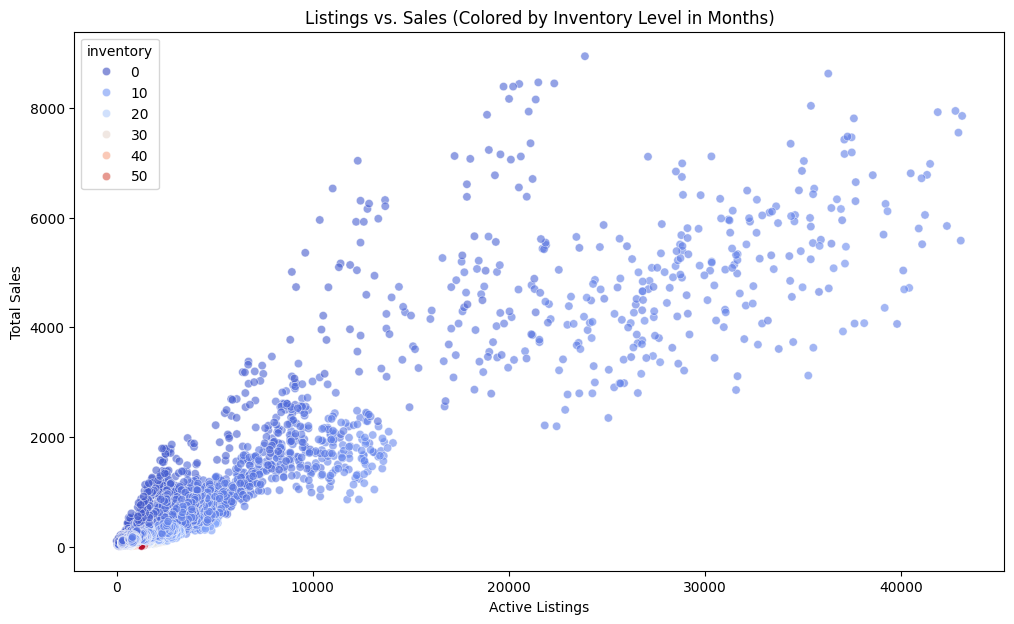

In [13]:
# Scatter plot of listings vs. sales, colored by inventory
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='listings', y='sales', hue='inventory', palette='coolwarm', alpha=0.6)
plt.title('Listings vs. Sales (Colored by Inventory Level in Months)')
plt.xlabel('Active Listings')
plt.ylabel('Total Sales')
plt.show()

Successfully found 3 clusters.


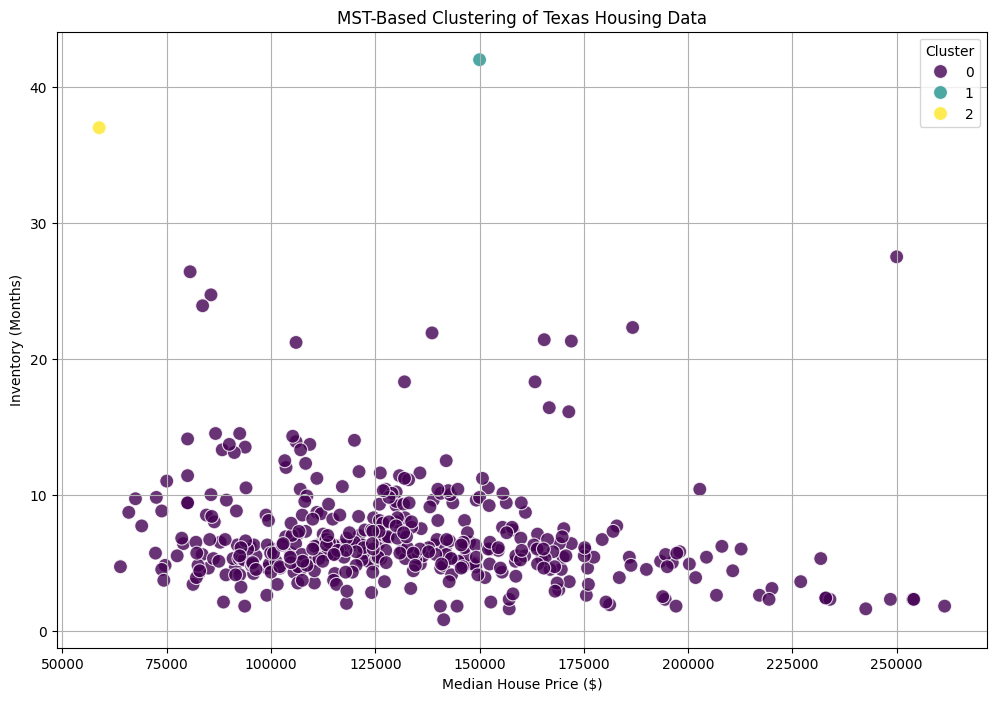

In [19]:
# Part 2 - Module 5
# Building the Minimum Spanning Tree (MST)

features = ['median', 'inventory']
df_cluster = df[features].dropna()

df_sample = df_cluster.sample(n=400, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

distance_matrix = squareform(pdist(X_scaled, 'euclidean'))

mst = minimum_spanning_tree(distance_matrix)

num_clusters = 4
edges_to_cut = num_clusters - 1

mst_edges = mst.toarray()
edge_weights = mst_edges[mst_edges.nonzero()]
sorted_weights = np.sort(edge_weights)[::-1]

threshold = sorted_weights[edges_to_cut - 1]
mst_edges[mst_edges > threshold] = 0

n_components, labels = connected_components(mst_edges)
df_sample['cluster'] = labels

print(f"Successfully found {n_components} clusters.")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_sample['median'],
    y=df_sample['inventory'],
    hue=df_sample['cluster'],
    palette='viridis',
    s=100,
    alpha=0.8
)

plt.title('MST-Based Clustering of Texas Housing Data- 22BDS0424')
plt.xlabel('Median House Price ($)')
plt.ylabel('Inventory (Months)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()